# ML Answers

- **Answer Set**: No. 02
- **Full Name**: Mohammad Hosein Nemati
- **Student Code**: `610300185`

---

## Basics

In this section we will done some basic steps:

### Libraries

Before begin, we must import these required libraries:

In [80]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

import xgboost as skxgb
import sklearn.svm as sksvm
import sklearn.tree as sktree
import sklearn.ensemble as skensemble

import torch as torch
import skorch as skorch

import sklearn.utils as skutils
import sklearn.compose as skcompose
import sklearn.metrics as skmetrics
import sklearn.pipeline as skpipeline
import sklearn.preprocessing as skprocessing
import sklearn.model_selection as skselection

sk.set_config(display="diagram")

### Dataset

Now we can load our dataset:

In [81]:
data_frame = pd.read_csv("../lib/pd_speech_features.csv", skiprows=1)
data_frame = skutils.shuffle(data_frame)

data_label = data_frame["class"]
data_frame = data_frame.drop(["class"], axis=1)

data_features = data_frame.to_numpy()
data_labels = data_label.to_numpy()

data_labels = np.array(data_labels, dtype=np.int32)

train_features, test_features, train_labels, test_labels = skselection.train_test_split(
    data_features, 
    data_labels, 
    test_size=0.3, 
    random_state=313
)

train_labels = train_labels.astype(np.int64)
test_labels = test_labels.astype(np.int64)

data_frame

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
490,163,1,0.78590,0.70792,0.34619,295,294,0.006555,0.000050,0.00136,...,1.6537,4.8595,3.3476,2.6767,2.3267,2.1156,3.4074,5.3279,3.4473,2.4617
613,204,0,0.82091,0.78661,0.60900,330,329,0.005854,0.000121,0.00449,...,3.6711,43.8298,24.7788,21.0369,19.4734,27.3490,14.1714,8.7262,9.1635,29.1908
323,107,1,0.80460,0.73701,0.32604,254,253,0.007594,0.000064,0.00137,...,10.6751,5.8603,7.8071,5.3248,4.2223,7.3281,12.2715,12.1886,8.2745,41.8950
430,143,1,0.82421,0.67507,0.42552,247,246,0.007795,0.000062,0.00133,...,1.6540,1.5302,46.8701,34.2457,32.0815,30.7043,15.5721,8.4372,10.8210,26.4979
85,28,0,0.87005,0.69617,0.28222,439,438,0.004396,0.000036,0.00076,...,3.4024,149.9964,122.8013,54.3187,21.1334,24.8140,56.2939,53.1500,41.3246,21.1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,91,1,0.21239,0.73750,0.72322,220,218,0.008503,0.000130,0.00521,...,1.5846,1.6131,3.7921,37.2527,7.7425,3.1142,5.2448,23.7179,24.2089,69.0340
17,5,1,0.82016,0.63124,0.37031,266,265,0.007257,0.000049,0.00086,...,1.5769,1.7350,16.2074,27.8125,48.7381,69.1536,65.6525,55.9719,48.5830,90.0073
537,179,1,0.24164,0.78342,0.63352,239,238,0.008095,0.000158,0.00214,...,1.5769,1.6122,14.7791,20.4438,5.5828,4.4942,6.0828,14.0307,10.6460,10.9042
418,139,1,0.64188,0.78507,0.69633,142,140,0.009392,0.003198,0.00410,...,1.8626,23.3561,8.5777,3.1276,2.7175,2.8110,3.3559,2.7336,2.8710,3.2689


---

## Problem

In this problem, we are going to fit seven types of models, before training each model, we will do a `Grid Search` with `Cross Validation` to find the best hyper parameters for the model.

### Decision Tree

In [82]:
decision_tree_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        # ("normalizer", skprocessing.Normalizer()),
        ("classifier", sktree.DecisionTreeClassifier())
    ]),
    param_grid={
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

decision_tree_predicts = decision_tree_model.predict(test_features)

decision_tree_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### Random Forest

In [83]:
random_forest_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("normalizer", skprocessing.Normalizer()),
        ("classifier", skensemble.RandomForestClassifier())
    ]),
    param_grid={
        "classifier__criterion": ["gini", "entropy"],
        "classifier__max_depth": [10, 50, 100, None]
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

random_forest_predicts = random_forest_model.predict(test_features)

random_forest_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalizer', Normalizer()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 50, 100, None]},
             scoring='accuracy')

### XGBoost

In [84]:
skxgb.set_config(verbosity=0)

xgboost_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("normalizer", skprocessing.Normalizer()),
        ("classifier", skxgb.XGBClassifier(use_label_encoder=False))
    ]),
    param_grid={},
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

xgboost_predicts = xgboost_model.predict(test_features)

xgboost_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalizer', Normalizer()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      use_label_encoder=False,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

### SVM

In [85]:
svm_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("normalizer", skprocessing.Normalizer()),
        ("classifier", sksvm.SVC())
    ]),
    param_grid={
        "classifier__C": [100000],
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

svm_predicts = svm_model.predict(test_features)

svm_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('normalizer', Normalizer()),
                                       ('classifier', SVC())]),
             n_jobs=-1, param_grid={'classifier__C': [100000]},
             scoring='accuracy')

### MLP

In [86]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(754, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 2)
        )
    
    def forward(self, x):
        return self.layers(x)

mlp_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("transformer", skprocessing.FunctionTransformer(np.float32)),
        ("normalizer", skprocessing.Normalizer()),
        ("classifier", skorch.NeuralNetClassifier(MLP))
    ]),
    param_grid={

    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

mlp_predicts = mlp_model.predict(test_features)

mlp_model

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.2358           nan  0.0286
      2           nan       0.2358           nan  0.0285
      3           nan       0.2358           nan  0.0278
      4           nan       0.2358           nan  0.0280
      5           nan       0.2358           nan  0.0370
      6           nan       0.2358           nan  0.0280
      7           nan       0.2358           nan  0.0420
      8           nan       0.2358           nan  0.0387
      9           nan       0.2358           nan  0.0330
     10           nan       0.2358           nan  0.0363


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        FunctionTransformer(func=<class 'numpy.float32'>)),
                                       ('normalizer', Normalizer()),
                                       ('classifier',
                                        <class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MLP'>,
))]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

### ELM

In [87]:
elm_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("transformer", skprocessing.FunctionTransformer(np.float32)),
        ("normalizer", skprocessing.Normalizer()),
        ("classifier", skorch.NeuralNetClassifier(MLP))
    ]),
    param_grid={
        
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

elm_predicts = elm_model.predict(test_features)

elm_model

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.2358           nan  0.0280
      2           nan       0.2358           nan  0.0210
      3           nan       0.2358           nan  0.0230
      4           nan       0.2358           nan  0.0230
      5           nan       0.2358           nan  0.0230
      6           nan       0.2358           nan  0.0210
      7           nan       0.2358           nan  0.0230
      8           nan       0.2358           nan  0.0270
      9           nan       0.2358           nan  0.0200
     10           nan       0.2358           nan  0.0310


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        FunctionTransformer(func=<class 'numpy.float32'>)),
                                       ('normalizer', Normalizer()),
                                       ('classifier',
                                        <class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MLP'>,
))]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

### AutoEncoder

In [88]:
auto_encoder_model = skselection.GridSearchCV(
    estimator=skpipeline.Pipeline([
        ("transformer", skprocessing.FunctionTransformer(np.float32)),
        ("normalizer", skprocessing.Normalizer()),
        ("classifier", skorch.NeuralNetClassifier(MLP))
    ]),
    param_grid={
        
    },
    scoring="accuracy",
    n_jobs=-1,
    cv=5
).fit(train_features, train_labels)

auto_encoder_predicts = auto_encoder_model.predict(test_features)

auto_encoder_model

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1           nan       0.7642           nan  0.0312
      2           nan       0.7642           nan  0.0157
      3           nan       0.7642           nan  0.0393
      4           nan       0.7642           nan  0.0161
      5           nan       0.7642           nan  0.0283
      6           nan       0.7642           nan  0.0313
      7           nan       0.7642           nan  0.0156
      8           nan       0.7642           nan  0.0313
      9           nan       0.7642           nan  0.0156
     10           nan       0.7642           nan  0.0156


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        FunctionTransformer(func=<class 'numpy.float32'>)),
                                       ('normalizer', Normalizer()),
                                       ('classifier',
                                        <class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.MLP'>,
))]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

### Results

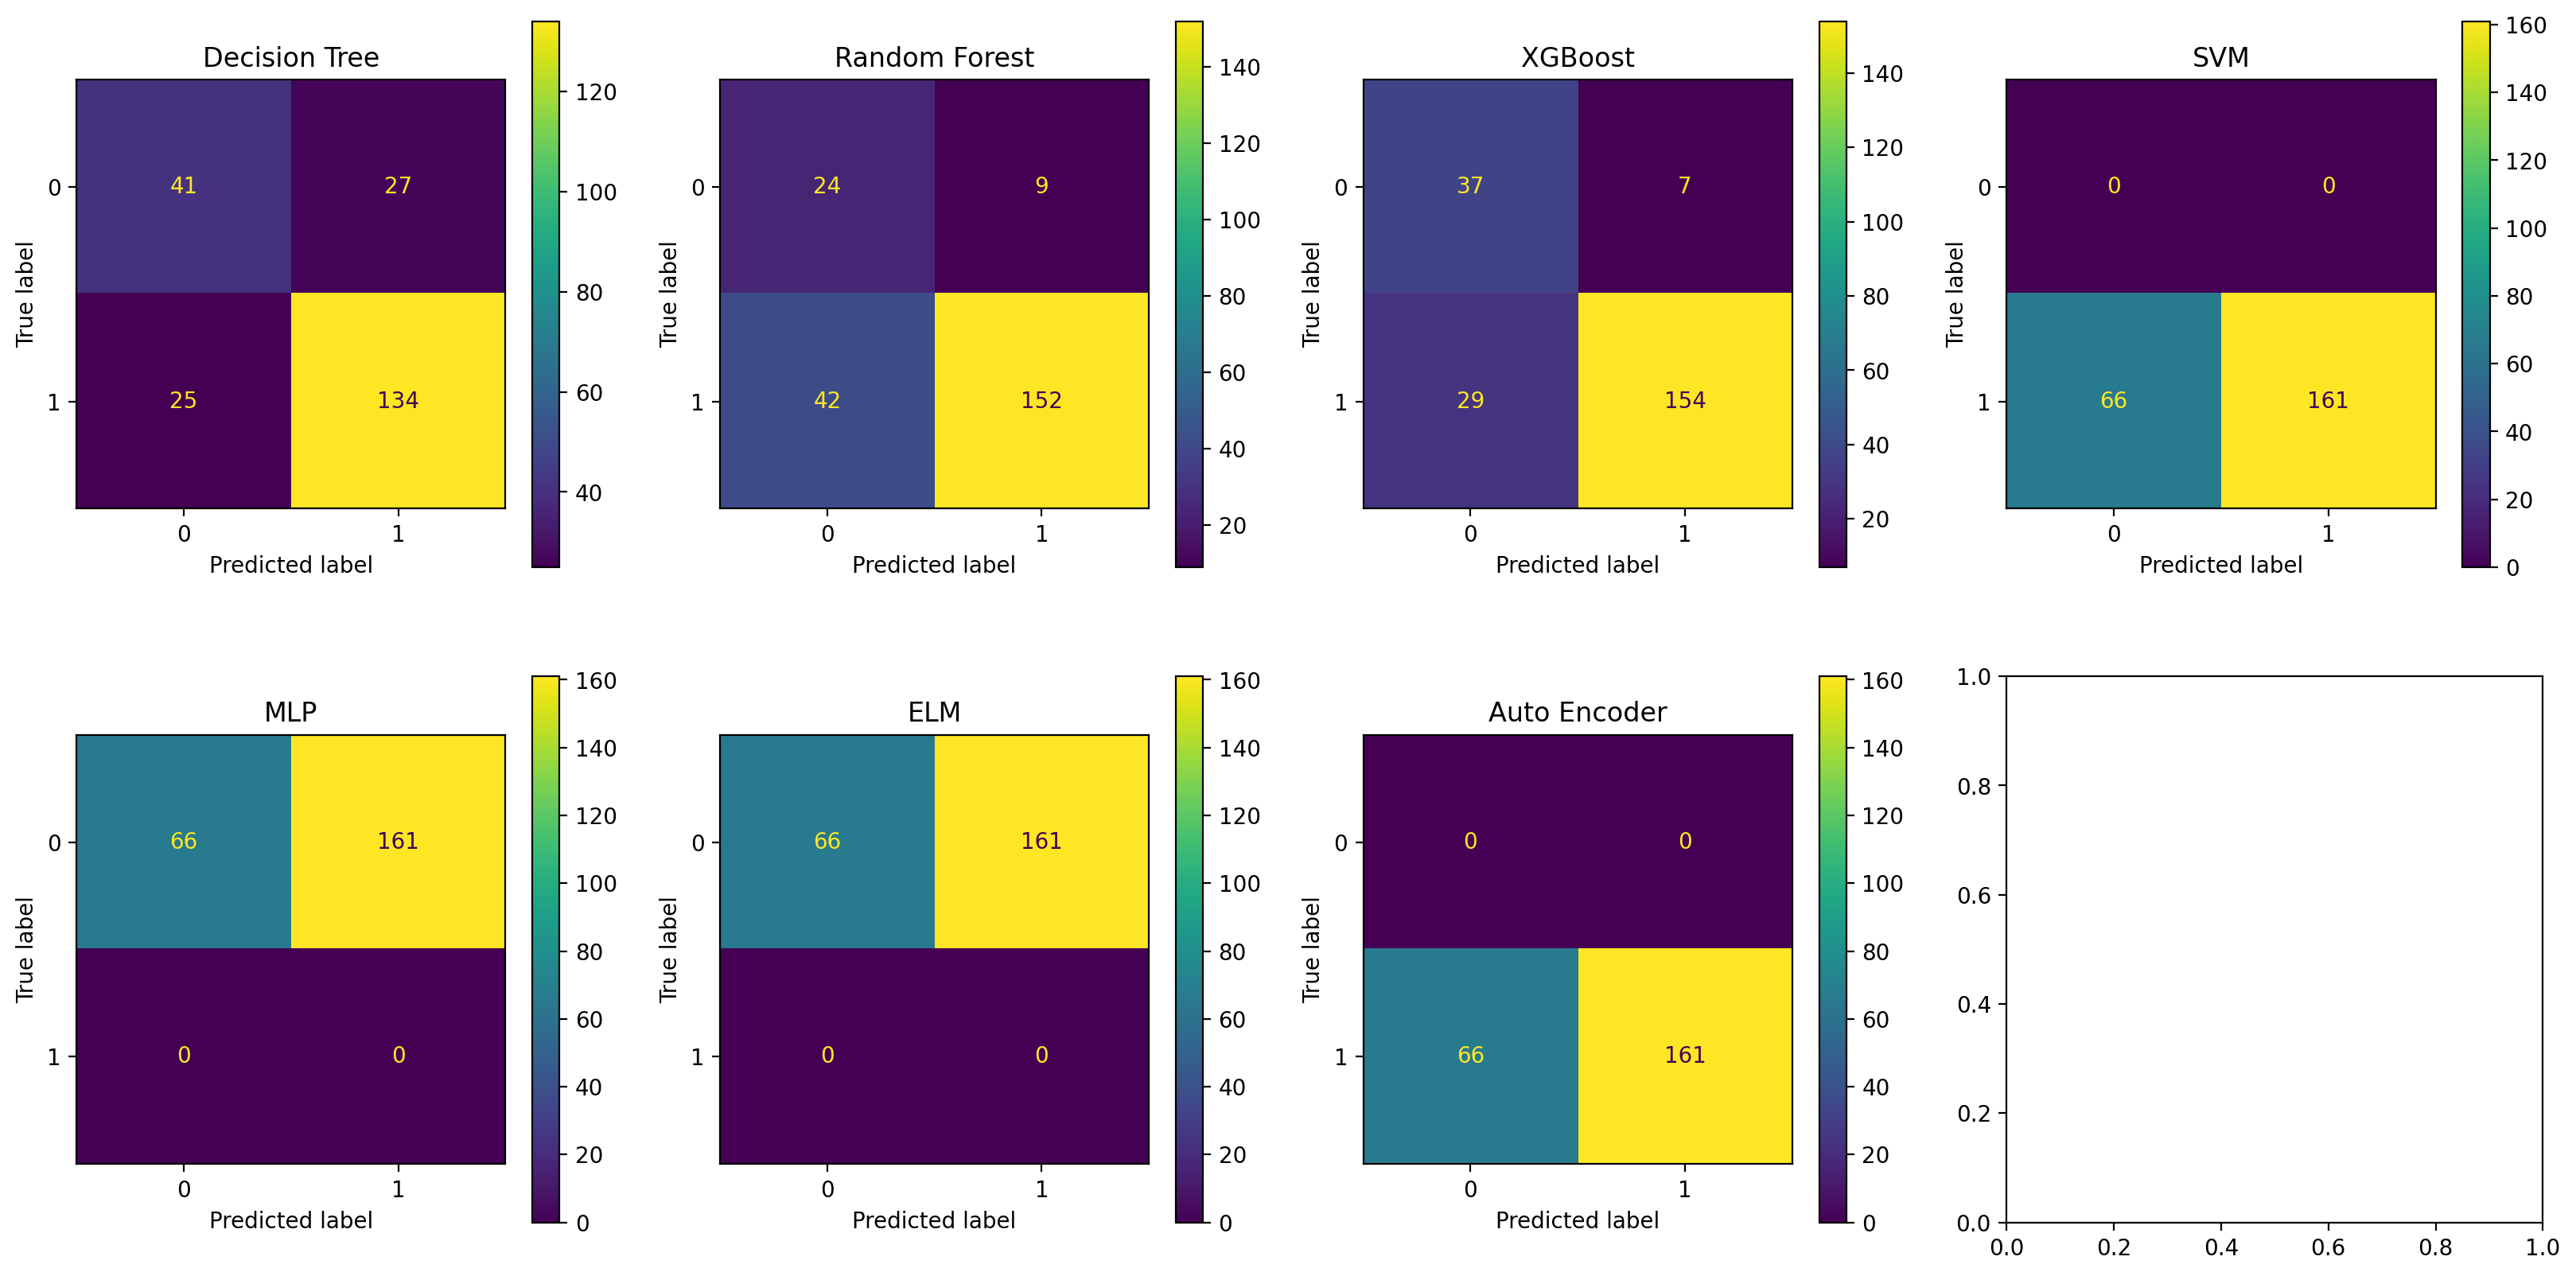

c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KoLiBer\Documents\Workspace\mlexercises\.venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KoLiBer\Documents\W

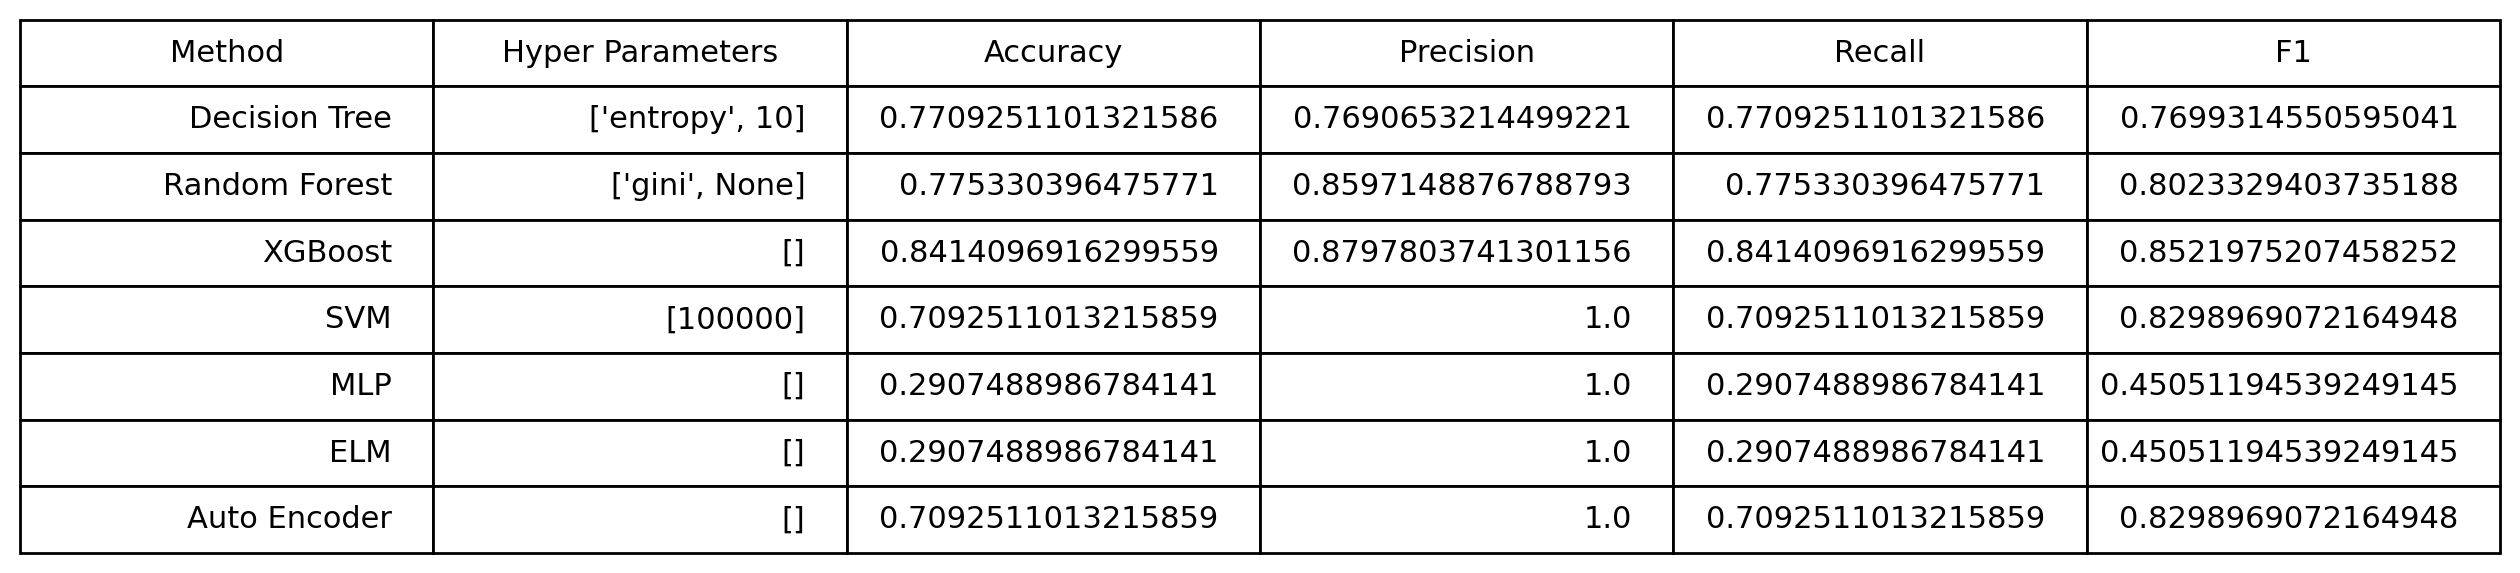

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10), dpi=200)
axes = axes.flatten()

axes[0].set_title("Decision Tree")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    decision_tree_predicts,
    test_labels,
    ax=axes[0]
)

axes[1].set_title("Random Forest")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    random_forest_predicts,
    test_labels,
    ax=axes[1]
)

axes[2].set_title("XGBoost")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    xgboost_predicts,
    test_labels,
    ax=axes[2]
)

axes[3].set_title("SVM")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    svm_predicts,
    test_labels,
    ax=axes[3]
)

axes[4].set_title("MLP")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    mlp_predicts,
    test_labels,
    ax=axes[4]
)

axes[5].set_title("ELM")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    elm_predicts,
    test_labels,
    ax=axes[5]
)

axes[6].set_title("Auto Encoder")
skmetrics.ConfusionMatrixDisplay.from_predictions(
    auto_encoder_predicts,
    test_labels,
    ax=axes[6]
)

plt.show()

plt.figure(figsize=(8, 1), dpi=200)
table = plt.table(cellText=[
    [
        "Decision Tree",
        list(decision_tree_model.best_params_.values()),
        skmetrics.accuracy_score(decision_tree_predicts, test_labels),
        skmetrics.precision_score(decision_tree_predicts, test_labels, average="weighted"),
        skmetrics.recall_score(decision_tree_predicts, test_labels, average="weighted"),
        skmetrics.f1_score(decision_tree_predicts, test_labels, average="weighted")
    ],
    [
        "Random Forest",
        list(random_forest_model.best_params_.values()),
        skmetrics.accuracy_score(random_forest_predicts, test_labels),
        skmetrics.precision_score(random_forest_predicts, test_labels, average="weighted"),
        skmetrics.recall_score(random_forest_predicts, test_labels, average="weighted"),
        skmetrics.f1_score(random_forest_predicts, test_labels, average="weighted")
    ],
    [
        "XGBoost",
        list(xgboost_model.best_params_.values()),
        skmetrics.accuracy_score(xgboost_predicts, test_labels),
        skmetrics.precision_score(xgboost_predicts, test_labels, average="weighted"),
        skmetrics.recall_score(xgboost_predicts, test_labels, average="weighted"),
        skmetrics.f1_score(xgboost_predicts, test_labels, average="weighted")
    ],
    [
        "SVM",
        list(svm_model.best_params_.values()),
        skmetrics.accuracy_score(svm_predicts, test_labels),
        skmetrics.precision_score(svm_predicts, test_labels, average="weighted"),
        skmetrics.recall_score(svm_predicts, test_labels, average="weighted"),
        skmetrics.f1_score(svm_predicts, test_labels, average="weighted")
    ],
    [
        "MLP",
        list(mlp_model.best_params_.values()),
        skmetrics.accuracy_score(mlp_predicts, test_labels),
        skmetrics.precision_score(mlp_predicts, test_labels, average="weighted"),
        skmetrics.recall_score(mlp_predicts, test_labels, average="weighted"),
        skmetrics.f1_score(mlp_predicts, test_labels, average="weighted")
    ],
    [
        "ELM",
        list(elm_model.best_params_.values()),
        skmetrics.accuracy_score(elm_predicts, test_labels),
        skmetrics.precision_score(elm_predicts, test_labels, average="weighted"),
        skmetrics.recall_score(elm_predicts, test_labels, average="weighted"),
        skmetrics.f1_score(elm_predicts, test_labels, average="weighted")
    ],
    [
        "Auto Encoder",
        list(auto_encoder_model.best_params_.values()),
        skmetrics.accuracy_score(auto_encoder_predicts, test_labels),
        skmetrics.precision_score(auto_encoder_predicts, test_labels, average="weighted"),
        skmetrics.recall_score(auto_encoder_predicts, test_labels, average="weighted"),
        skmetrics.f1_score(auto_encoder_predicts, test_labels, average="weighted")
    ]
], colLabels=["Method", "Hyper Parameters", "Accuracy", "Precision", "Recall", "F1"], loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(2, 2)
plt.axis("off")
plt.show()

After a lot of tries, we can see:

- The `Decision Tree` model is a good fit with a low learning time
- The `Random Forest` model is very good fit with a some learning time
- The `XGBoost` model is very good fit with a high learning time
- The `SVM` model is not a good solution for this king of problem with a lot of features

---